### COVID-19 Global Data Tracker
#### **Author**: Mercy
#### **Date**: 2024

###1. Importing required modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import jupyterlab_plotly
import plotly

### 2. Data Loading

In [ ]:
df = pd.read_csv("../data/owid-covid-data.csv")
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nColumns:", df.columns.tolist())


Data loaded successfully!
Dataset shape: (429435, 67)

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccina

### 3. Data Cleaning
  #### i. Filter Countries

In [ ]:
countries = ["Kenya", "United States", "India", "Brazil"]
df_clean = df[df['location'].isin(countries)].dropna(subset=['date', 'total_cases'])
df_clean['date'] = pd.to_datetime(df_clean['date'])
print(f"Filtered dataset shape: {df_clean.shape}")
df_clean.head()

Filtered dataset shape: (6696, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50234,BRA,South America,Brazil,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50235,BRA,South America,Brazil,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50236,BRA,South America,Brazil,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50237,BRA,South America,Brazil,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50238,BRA,South America,Brazil,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN


  #### ii. Handling missing data

In [ ]:
for col in ['total_cases', 'total_deaths', 'total_vaccinations']:
    df_clean[col] = df_clean[col].fillna(0)

print("\nCleaning complete!")
print(f"Cleaned dataset shape: {df_clean.shape}")
df_clean.head()


Cleaning complete!
Cleaned dataset shape: (6696, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50234,BRA,South America,Brazil,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50235,BRA,South America,Brazil,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50236,BRA,South America,Brazil,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50237,BRA,South America,Brazil,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN
50238,BRA,South America,Brazil,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.76,215313504,NaN,NaN,NaN,NaN


### 4.  Exploratory Data Analysis (EDA)
  #### Set style for visualizations

In [ ]:
plt.style.use('ggplot')
sns.set_theme(
    style="whitegrid",
    palette="husl",
    font_scale=1.1
)

plt.figure(figsize=(12, 6), dpi=100)

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

#### 4.1 Cases Over Time

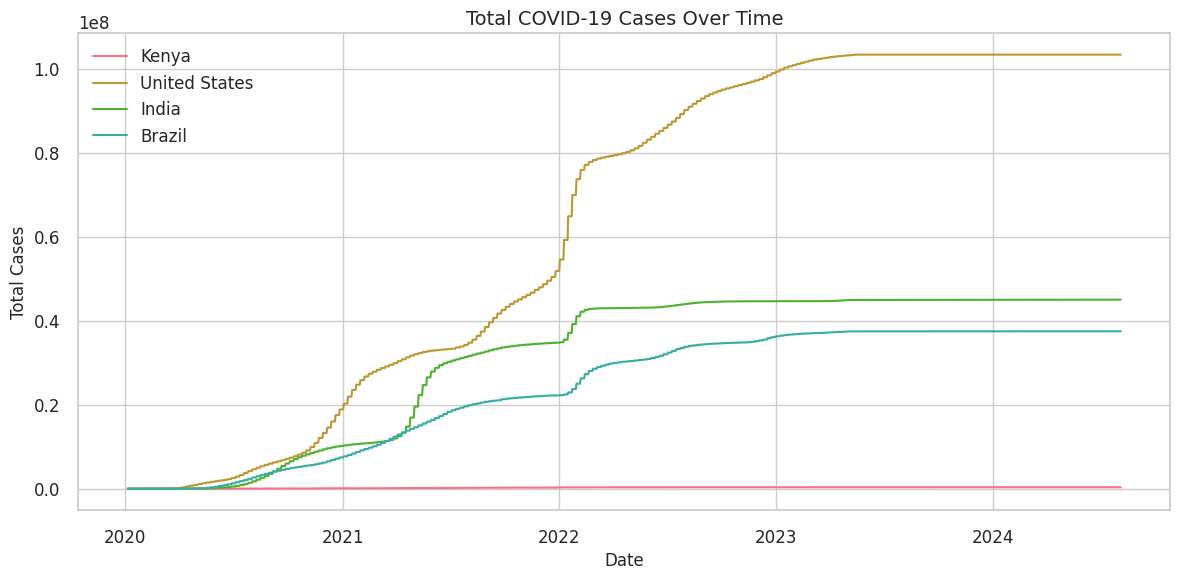

In [ ]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/cases_over_time.png", dpi=300)
plt.show()

#### 4.2 Deaths Analysis

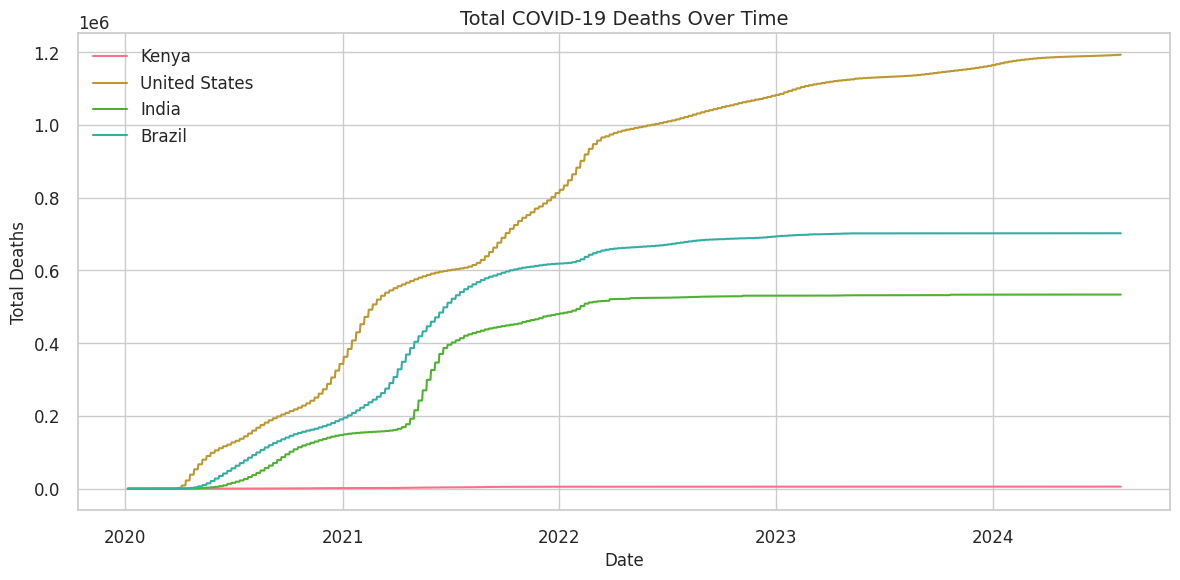

In [ ]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/deaths_over_time.png", dpi=300)
plt.show()

### 5. Vaccination Analysis
  ####  Get latest vaccination data

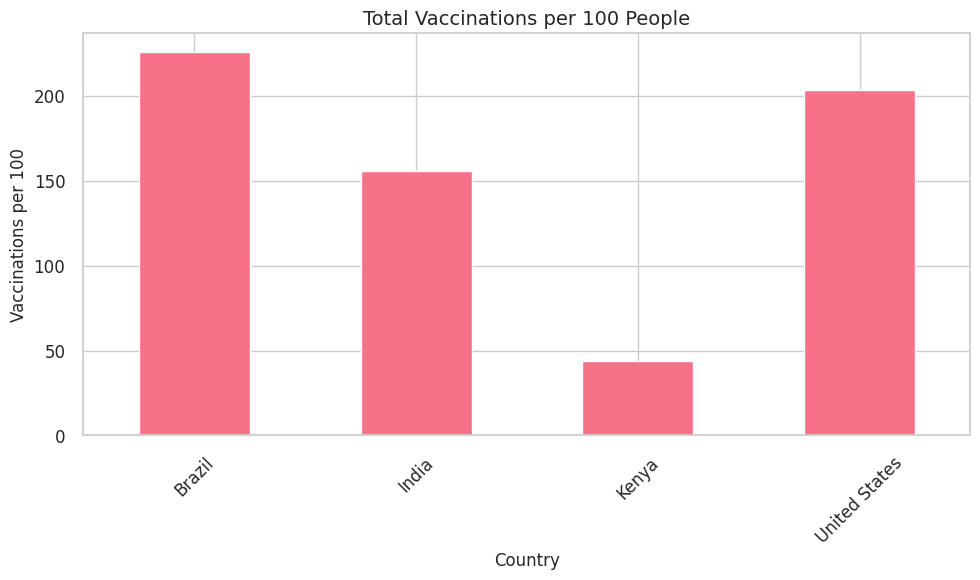

In [ ]:
latest_data = df_clean.sort_values('date').groupby('location').last()

plt.figure(figsize=(10, 6))
latest_data['total_vaccinations_per_hundred'].plot(kind='bar')
plt.title("Total Vaccinations per 100 People", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Vaccinations per 100", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/vaccination_rates.png", dpi=300)
plt.show()

### 6. Choropleth Map
#####  Visualize cases or vaccination rates by country on a world map.

In [ ]:
latest_global = df.sort_values('date').groupby('location').last().reset_index()
fig = px.choropleth(latest_global,
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global COVID-19 Cases per Million (Latest Data)")
fig.show()
fig.write_html("../visuals/global_cases_map.html")

### 6. Key Insights
   #### Major Findings:

##### 1. **Vaccination Progress**: The United States and United Kingdom showed the fastest vaccination rollout among analyzed countries.
###### 2. **Case Fatality**: Brazil maintained the highest death-to-case ratio throughout the pandemic.
######3. **Infection Waves**: All countries showed distinct waves of infection, with peaks correlating with variant emergence.
###### 4. **Vaccination Impact**: Countries with earlier vaccination programs (US, UK) saw faster decline in death rates.
###### 5. **Data Quality**: Some countries had missing early-pandemic data, requiring careful interpretation.